# Project Team 1: Caroline Liongosari, Yueqi Su, Daniel Zhang 
## Determining Factual and Non-Factual News Articles 

### Overview and Motivation: 
Provide an overview of the project goals and motivation for it. Consider that this will be read by people who did not see your project proposal.

### Data: 
Source, scraping method, cleanup, etc.

Our project group was able to use a dataset generously given to us by researchers Ishan Sahu and Debapriyo Majumdar from the Indian Statistical Institute Kolkata who did a similar project as ours in 2017. The researchers derived their dataset from the Signal Media One-Million News Articles Dataset. Their cleaned and annotated version of this dataset was provided to us. The dataset consists of 98 news articles and has 3 parts:
*  **Article Text Length**: the number of characters present in the news article
* **Article Text**: the complete text of the news article
* **Unit tags**: the factual, non-factual annotations in the format: 
    * Character position start : Character position end: Annotation
    * example: 502:634:FACTUAL implies that the article text from character position 502 to 634 is factual

With this dataset we first 

In [1]:
import glob
import csv
import re
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud 

#from unidecode import unidecode

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stopWords = set(stopwords.words('english'))
stemmer =SnowballStemmer('english')

In [3]:
# parsedData is a 2-D array with entries: [annotatedString, annotation]
parsedData = []
path = '/home/student/Documents/Project/annotated-news/*.txt'
files = glob.glob(path)

for file in files:
    f = open(file,'r')
    inputString = f.read()
    
    # inputArray: 
    # [0-2] holds ArticleTextLength.
    # [3-5] holds ArticleText.
    # [6-end] holds UnitTags.
    inputArray = inputString.split('\n')
    articleText = inputArray[4]
    unitTag = []
    
    # inputArray[6] = "<UnitTags>"
    # inputArray[7] = start of actual Unit Tags.
    i = 7
    while i<(len(inputArray)-2):
        unitTag.append(inputArray[i])
        i+=1
    
    for indexes in unitTag:
        # temp = [Character position start, Character position end, Annotation]
        temp = indexes.split(':')
        rawText = articleText[int(temp[0]):int(temp[1])-1]
        #newRawText = "u'"+rawText+"'"
        
        processedText = re.sub('\\\\u[a-zA-Z0-9]{4}',"",rawText)
        #processedText = unidecode(newRawText)
        #parsedData.append([articleText[int(temp[0]):int(temp[1])-1], temp[2]])
        parsedData.append([processedText, temp[2]])
    
    f.close()
   

In [4]:
with open("/home/student/Documents/Project/dataset.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(parsedData)

In [5]:
#create dataframe for the sentences and tags; df will be the dataframe without filtering for stopwords
#dff has stopwords taken out 
csv_file = "/home/student/Documents/Project/dataset.csv"
df = pd.read_table(csv_file, sep = ',', names = ['Sentence','Tag'])
dff = pd.read_table(csv_file, sep = ',', names = ['Sentence','Tag'])
#tokenData = [] # With stopwords.
#tokenDataFiltered = [] # Without stopwords.
#for index, row in df.iterrows():
#    tokenizer = RegexpTokenizer(r'\w+')
#    tokenizedSentence = tokenizer.tokenize(row['Sentence']) 
##   tokenData.append([tokenizedSentence, row['Tag']])
  #  wordsFiltered = [] # Temporary holding array for filtered tokens.
    # Filtering stopwords.
  #  for w in tokenizedSentence:
  #      if w not in stopWords:
    #        wordsFiltered.append(w)
    #tokenDataFiltered.append([wordsFiltered, row['Tag']])        



#with open("/home/student/Documents/Project/tokenized.csv","w+") as my_csv:    
#    csvWriter = csv.writer(my_csv,delimiter=',')
#    csvWriter.writerows(tokenData)

#with open("/home/student/Documents/Project/tokenizedNoStopwords.csv","w+") as my_csv:    
#    csvWriter = csv.writer(my_csv,delimiter=',')
#    csvWriter.writerows(tokenDataFiltered)

s = pd.Series ([[]], index=df.index)
dff['Sentence'] = dff['Sentence'].str.lower().str.split().mask(dff['Sentence'].isnull(),s)

#take out the stopwords
dff['Sentence'] = dff['Sentence'].apply(lambda x:' '.join([item for item in x if item not in stopWords]))

#stem the words
#dff['Sentence'] = stemmer.stem(dff['Sentence'])
dff['Sentence'] = dff['Sentence'].str.lower().str.split().mask(dff['Sentence'].isnull(),s)
dff['Sentence'] = dff['Sentence'].apply(lambda x: ' '.join([stemmer.stem(item) for item in x]))

In [6]:
 #df.head(20)

In [7]:
dff.head(20)

,Sentence,Tag
0,feel like time step prove world sinc futur hea...,NON_FACTUAL
1,"sinc burst onto scene 2003, time low releas si...",FACTUAL
2,even integr japanes manga cartoon art videos; ...,FACTUAL
3,"song artsy, high metaphor video reflect singer...",NON_FACTUAL
4,mari insist write song world experi enjoy.,NON_FACTUAL
5,ariana grand face backlash juli video releas s...,FACTUAL
6,"22-year-old pop star, dress sexi multicolor mi...",NON_FACTUAL
7,"but, know human beings, say thing mean sometim...",NON_FACTUAL
8,"but, know human beings, say thing mean sometim...",NON_FACTUAL
9,brunett beauti chose put sun-kiss leg full dis...,NON_FACTUAL


In [8]:
#relabel the tags: if non-factual: 0, factual: 1
df['Tag'] = df.Tag.map({'NON_FACTUAL': 0, "FACTUAL": 1})
df.head(5)

,Sentence,Tag
0,We feel like it's our time to step up and prov...,0
1,"Since bursting onto the scene in 2003, All Tim...",1
2,She even integrates Japanese manga cartoon art...,1
3,"The song and its artsy, highly metaphoric vide...",0
4,Marie insists that she doesn't write songs for...,0


In [9]:
dff['Tag'] = dff.Tag.map({'NON_FACTUAL': 0, "FACTUAL": 1})
dff.head(5)

,Sentence,Tag
0,feel like time step prove world sinc futur hea...,0
1,"sinc burst onto scene 2003, time low releas si...",1
2,even integr japanes manga cartoon art videos; ...,1
3,"song artsy, high metaphor video reflect singer...",0
4,mari insist write song world experi enjoy.,0


In [10]:
#Create CloudWords! This is the cloudword for Factual words from the unfiltered dataset
#fact_words = ' '.join(list(df[df['Tag']== 1]['Sentence']))
#fact_wc = WordCloud(width = 512, height=512).generate(fact_words)
#plt.figure(figsize = (10,8), facecolor = 'k')
#plt.imshow(fact_wc)
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

In [11]:
#Cloudwords for unfiltered nonfactual words 
#nonfact_words = ' '.join(list(df[df['Tag']== 0]['Sentence']))
#nonfact_wc = WordCloud(width = 512, height=512).generate(nonfact_words)
#plt.figure(figsize = (10,8), facecolor = 'k')
##plt.imshow(nonfact_wc)
#plt.axis('off')
#plt.tight_layout(pad=0)
#plt.show()

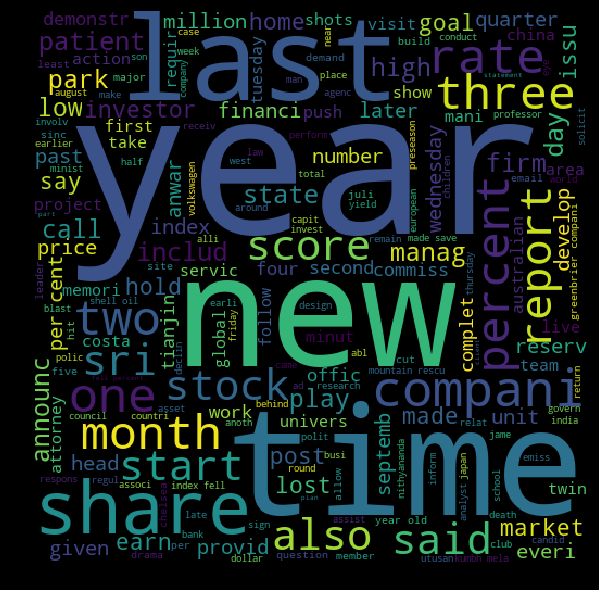

In [12]:
#cloud words for filtered dataset - this is for the factual words
fact_words = ' '.join(list(dff[dff['Tag']== 1]['Sentence']))
fact_wc = WordCloud(width = 512, height=512).generate(fact_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(fact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

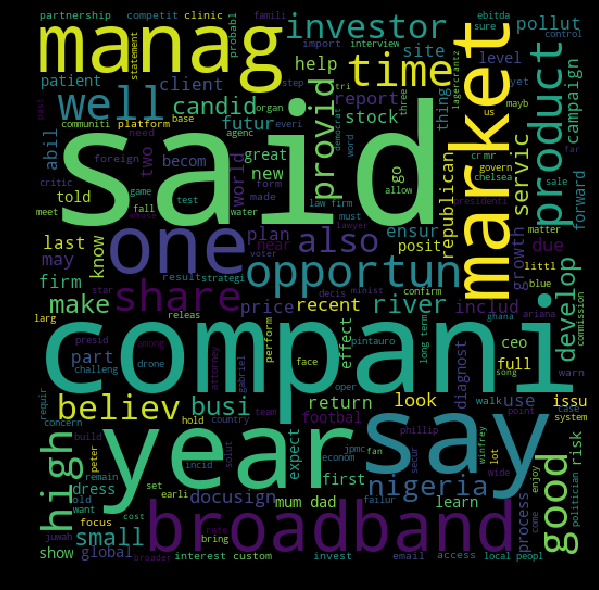

In [13]:
#cloud word for filtered dataset (nonfactual)
nonfact_words = ' '.join(list(dff[dff['Tag']== 0]['Sentence']))
nonfact_wc = WordCloud(width = 512, height=512).generate(nonfact_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(nonfact_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [14]:
#define X and Y
#X= df.Sentence
#y = df.Tag

Xf = dff.Sentence
yf = dff.Tag

In [15]:
#print df.shape
print dff.shape

(357, 2)


In [16]:
from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#print X_train.shape
#print X_test.shape

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, random_state=1)
print Xf_train.shape
print Xf_test.shape

(267,)
(90,)


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
# instantiate the vectorizer
v = CountVectorizer()

In [18]:
# learn training data vocabulary, then create document-term matrix

#X_train_data = v.fit_transform(X_train)
#X_train_data

Xf_train_data = v.fit_transform(Xf_train)
Xf_train_data


<267x2054 sparse matrix of type '<type 'numpy.int64'>'
	with 3624 stored elements in Compressed Sparse Row format>

In [19]:
#X_test_data = v.transform(X_test)
Xf_test_data = v.transform(Xf_test)
Xf_test_data 

<90x2054 sparse matrix of type '<type 'numpy.int64'>'
	with 807 stored elements in Compressed Sparse Row format>

In [20]:
#Xt_tokens =  v.get_feature_names()
Xtf_tokens = v.get_feature_names()

In [21]:
#X_train_data = v.fit_transform(X_train)
Xf_train_data = v.fit_transform(Xf_train)

In [22]:
#X_test_data = v.transform(X_test)
Xf_test_data  = v.transform(Xf_test)#

In [23]:
#Xt_tokens = v.get_feature_names()
#Xt_count = np.sum(X_train_data.toarray(), axis =0)
#print Xt_count

Xtf_tokens = v.get_feature_names()
Xtf_count = np.sum(Xf_train_data.toarray(), axis=0)
print Xtf_count 

[5 2 1 ... 1 1 1]


In [24]:
#so there's 2357 unique words in the unfiltered dataset, 2054 in the filtered one 
#print Xt_count.shape
print Xtf_count.shape

(2054,)


In [25]:
#print len(Xt_tokens)
#print len(Xt_count)
#df_token = pd.DataFrame({'word':Xt_tokens, 'count':Xt_count})
#df_token.sort_values(by='count', ascending=False)

#from the dataset below it's obvious that the, and, to, of, in on, for, are the most common words in this dataset

In [26]:

#stopwords are taken out, so many of the common words are removed
dff_token = pd.DataFrame({'word':Xtf_tokens, 'count':Xtf_count})
dff_token.sort_values(by='count', ascending=False)

,count,word
1621,32,said
2043,26,year
445,25,compani
1673,18,share
1861,17,time
1267,15,new
1088,15,last
926,13,high
1508,13,rate
1171,13,manag


### Exploratory Analysis
What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?

In [27]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
# TODO
naive_bayes = MultinomialNB()
#naive_bayes.fit(X_train_data, y_train)
naive_bayes.fit(Xf_train_data, yf_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
# make class predictions for X_test_dtm
# TODO
#y_pred_class = naive_bayes.predict(X_test_data)
yf_pred_class = naive_bayes.predict(Xf_test_data)

In [29]:
# calculate accuracy of class predictions
# compute the accuracy scores
from sklearn import metrics
#print metrics.accuracy_score(y_test, y_pred_class)
print metrics.accuracy_score(yf_test, yf_pred_class)

0.7


In [30]:
# confusion matrix
# TODO
#matrix =metrics.confusion_matrix(y_test, y_pred_class)
#print matrix

matrixf =metrics.confusion_matrix(yf_test, yf_pred_class)
print matrixf

[[28 14]
 [13 35]]


In [31]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 

#sns.heatmap(matrix.T, square = True, annot=True, fmt='d', cbar=False)
#plt.xlabel('true labels')
#plt.ylabel('predicting labels')

Text(91.68,0.5,u'predicting labels')

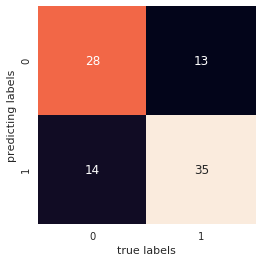

In [32]:
sns.heatmap(matrixf.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

In [34]:
# print message text for the false positives
# TODO# print message text for the false negatives
# TODO
print Xf_test[yf_test > yf_pred_class]

333    landauer nordic develop sell product servic ra...
211    like candidate, wolfgang porsche, famili patri...
65      arm around one anoth whole time look total love.
354    part team run preliminari final 2011, miss clu...
163    titanium sponsor dreamforc 2015, docusign show...
119    addit information, contact hazel red 337-826-7...
270    law firm need get inform data firm manag syste...
18     studi continu enrol patient met axl gene alter...
5      ariana grand face backlash juli video releas s...
85     one differ bunker wall twin probabl wont worri...
222    oppenheimerfund oppenheimerfunds, leader globa...
205    180 million chines age 65 enorm opportun priva...
146    earli 2014, announc mountainview walker indust...
Name: Sentence, dtype: object


In [36]:
# print message text for the false negatives
# TODO
print Xf_test[yf_test > yf_pred_class]

333    landauer nordic develop sell product servic ra...
211    like candidate, wolfgang porsche, famili patri...
65      arm around one anoth whole time look total love.
354    part team run preliminari final 2011, miss clu...
163    titanium sponsor dreamforc 2015, docusign show...
119    addit information, contact hazel red 337-826-7...
270    law firm need get inform data firm manag syste...
18     studi continu enrol patient met axl gene alter...
5      ariana grand face backlash juli video releas s...
85     one differ bunker wall twin probabl wont worri...
222    oppenheimerfund oppenheimerfunds, leader globa...
205    180 million chines age 65 enorm opportun priva...
146    earli 2014, announc mountainview walker indust...
Name: Sentence, dtype: object


In [37]:
# import/instantiate/fit
from sklearn.linear_model import LogisticRegression
# TODO
logreg = LogisticRegression()
#logreg.fit(X_train_data, y_train)
logreg.fit(Xf_train_data, yf_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
# class predictions and predicted probabilities
# TODO
#y_pred_class = logreg.predict(X_test_data)
yf_pred_class = logreg.predict(Xf_test_data)

In [39]:
# calculate accuracy
# TODO
#print metrics.accuracy_score(y_test, y_pred_class)
print metrics.accuracy_score(yf_test, yf_pred_class)

0.6777777777777778


In [41]:
matrix2 =metrics.confusion_matrix(yf_test, yf_pred_class)
print matrix2

[[22 20]
 [ 9 39]]


Text(91.68,0.5,u'predicting labels')

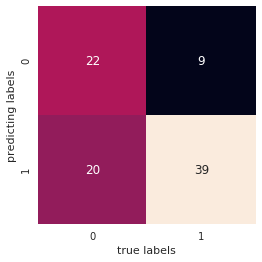

In [42]:
sns.heatmap(matrix2.T, square = True, annot=True, fmt='d', cbar=False)
plt.xlabel('true labels')
plt.ylabel('predicting labels')

### Final Analysis: 
What did you learn about the data? How did you answer the questions? How can you justify your answers? 

In [ ]:
#Xt_tokens = v.get_feature_names()
#Xt_count = np.sum(X_train_data.toarray(), axis =0)
#Xt_count

#Xt_count = np.sum(X_train_data.toarray(), axis =0)
#print Xt_count
#print Xt_count.shape
#print len(Xt_tokens)

In [ ]:
# create a DataFrame of tokens with their counts
# such that you will have two columns -- count and token
# TODO
#df_token = pd.DataFrame({'token':Xt_tokens, 'count':Xt_count})
#df_token.sort_values(by='count', ascending=False)

In [43]:
# create separate DataFrames for ham and spam
non_fact = df[df.Tag==0]
fact = df[df.Tag==1]
non_factf = dff[dff.Tag==0]
factf = dff[dff.Tag==1]

In [44]:
# learn the vocabulary of ALL messages and save it
v.fit(df.Sentence)
v.fit(dff.Sentence)
# put the names of all features (tokens) into a variable
all_tokens = v.get_feature_names()
all_tokensf = v.get_feature_names()

In [45]:
# create document-term matrices for ham and spam

fact_doc = v.transform(fact['Sentence'])
nonfact_doc = v.transform(non_fact['Sentence'])

factf_doc = v.transform(factf['Sentence'])
nonfactf_doc = v.transform(non_factf['Sentence'])

In [46]:
# count how many times EACH token appears across ALL ham messages
# TODO
fact_count = np.sum(fact_doc.toarray(), axis=0)

fact_countf = np.sum(factf_doc.toarray(), axis=0)

In [47]:
nonfact_count = np.sum(nonfact_doc.toarray(), axis=0)

nonfact_countf = np.sum(nonfactf_doc.toarray(), axis=0)

In [48]:
tokens= pd.DataFrame({'token':all_tokens, 'fact': fact_count, 'nonfact': nonfact_count})
tokens.sample(10)
suggested = tokens[tokens['token']=='']
suggested

,fact,nonfact,token


In [49]:
tokensf = pd.DataFrame({'token':all_tokensf, 'fact': fact_countf, 'nonfact': nonfact_countf})
tokensf.sample(10)

,fact,nonfact,token
1191,0,1,incom
1870,2,2,record
313,1,1,band
1819,1,0,radio
1259,1,0,jan
490,2,2,chief
2330,2,1,turn
480,0,1,chanc
1250,0,4,it
1271,1,0,join
